In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data 

In [3]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender'],
      dtype='object')

## Data preprocessing

In [5]:
df['effective_date']=pd.DatetimeIndex(df.effective_date)
df['due_date']=pd.DatetimeIndex(df.due_date)

In [6]:
df.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female


In [7]:
print(df.loan_status.unique())

['PAIDOFF' 'COLLECTION']


In [8]:
#command to seaborn which is useful for data visualization
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         154 KB  anaconda

The following packages will be UPDATED:

    certifi:         2019.9.11-py36_0     conda-forge --> 2019.9.11-py36_0 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.9.11-hecc5488_0 conda-forge --> 2019.8.28-0      anaconda


certifi-2019.9.11    | 154 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


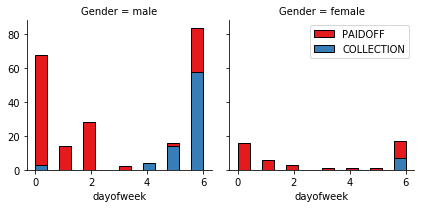

In [9]:
import seaborn as sns
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 15)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [10]:
from above graph we can observe that people who got loan at the end of the week , don't paid the loan

SyntaxError: invalid syntax (<ipython-input-10-9068e811e1a1>, line 1)

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 0 if (x<4)  else 1)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
status_map={'PAIDOFF':1,'COLLECTION':0}
df['loan_status_trgt']=df['loan_status'].map(status_map)

In [13]:
print(df.loan_status_trgt.unique())

[1 0]


In [14]:
df['loan_status_trgt'].value_counts()

1    260
0     86
Name: loan_status_trgt, dtype: int64

In [15]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender', 'dayofweek', 'weekend',
       'loan_status_trgt'],
      dtype='object')

Since 'education' and 'gender' are not integer type we convert with some dummy variables

In [16]:
dummies = pd.get_dummies(df['education']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['education'],  axis=1)

dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Gender'], axis=1)

In [17]:
df.head(3)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,dayofweek,weekend,loan_status_trgt,is_Bechalor,is_High School or Below,is_Master or Above,is_college,is_female,is_male
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,3,0,1,0,1,0,0,0,1
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,3,0,1,1,0,0,0,1,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,0,1,0,0,0,1,0,1


In [18]:
df=df.drop(['is_female','is_Master or Above'],axis=1)

In [19]:
df.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,dayofweek,weekend,loan_status_trgt,is_Bechalor,is_High School or Below,is_college,is_male
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,3,0,1,0,1,0,1
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,3,0,1,1,0,0,0


In [20]:
df = df.drop(['Loan_ID','loan_status','effective_date','due_date','dayofweek'],axis=1)

In [21]:
df.head(2)

,Principal,terms,age,weekend,loan_status_trgt,is_Bechalor,is_High School or Below,is_college,is_male
0,1000,30,45,0,1,0,1,0,1
1,1000,30,33,0,1,1,0,0,0


splitting into input varible X and target variable y

In [22]:
X=df.drop(['loan_status_trgt'],axis=1)
y=df.loan_status_trgt

converting pandas dataframes into numpy arrays

In [23]:
X=np.asarray(X)
y=np.asarray(y)

In [24]:
print(X)

[[1000   30   45 ...    1    0    1]
 [1000   30   33 ...    0    0    0]
 [1000   15   27 ...    0    1    1]
 ...
 [ 800   15   39 ...    0    1    1]
 [1000   30   28 ...    0    1    1]
 [1000   30   26 ...    0    1    1]]


In [25]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
from sklearn import preprocessing

In [27]:
X_norm=preprocessing.StandardScaler(with_mean=True,with_std=True).fit(X).transform(X.astype(float))
X_norm[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.38170062,
         1.13639374, -0.86968108,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805,  2.61985426,
        -0.87997669, -0.86968108, -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.38170062,
        -0.87997669,  1.14984679,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679, -2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679,  0.42056004]])

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=5)

In [30]:
print(X_train.shape)
print(X_test.shape)

(276, 8)
(70, 8)


# KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k=20
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [34]:
yhat=knn.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 1])

In [36]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [37]:
#calculating accuracy for different k values
ks=20
mean_accu=np.zeros(ks-1)
for i in range(1,ks):
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_accu[i-1]=accuracy_score(y_test,yhat)
print(mean_accu)
    

[0.65714286 0.68571429 0.7        0.71428571 0.7        0.67142857
 0.68571429 0.7        0.68571429 0.67142857 0.65714286 0.68571429
 0.7        0.68571429 0.7        0.68571429 0.68571429 0.67142857
 0.68571429]


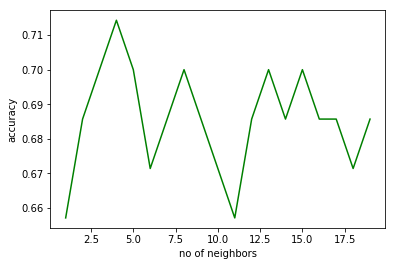

In [38]:
plt.plot(range(1,ks),mean_accu,'g')
plt.xlabel('no of neighbors')
plt.ylabel('accuracy')
plt.show()

In [39]:
k = mean_accu.argmax()+1
print(k)

4


we are getting more accuracy when k=4

In [41]:
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn.predict(X_test)
print("Train set Accuracy: ",accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ",accuracy_score(y_test, yhat))
print("Avg F1-score: " ,f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: " ,jaccard_similarity_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train set Accuracy:  0.822463768115942
Test set Accuracy:  0.7142857142857143
Avg F1-score:  0.7228260869565217
Jaccard score:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.52      0.67      0.58        21
           1       0.84      0.73      0.78        49

   micro avg       0.71      0.71      0.71        70
   macro avg       0.68      0.70      0.68        70
weighted avg       0.74      0.71      0.72        70



# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X_train,y_train)
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
yhat2=dtree.predict(X_test)
yhat2

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1])

In [45]:
print("Avg F1-score: ",f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: ",jaccard_similarity_score(y_test, yhat2))
print (classification_report(y_test, yhat2))

Avg F1-score:  0.6717077315208156
Jaccard score:  0.7
              precision    recall  f1-score   support

           0       0.50      0.29      0.36        21
           1       0.74      0.88      0.80        49

   micro avg       0.70      0.70      0.70        70
   macro avg       0.62      0.58      0.58        70
weighted avg       0.67      0.70      0.67        70



In [46]:
#command to install pydotplus
!conda install -c conda-forge pydotplus

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.8.28-0      anaconda --> 2019.9.11-hecc5488_0 conda-forge
    certifi:         2019.9.11-py36_0 anaconda --> 2019.9.11-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [47]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

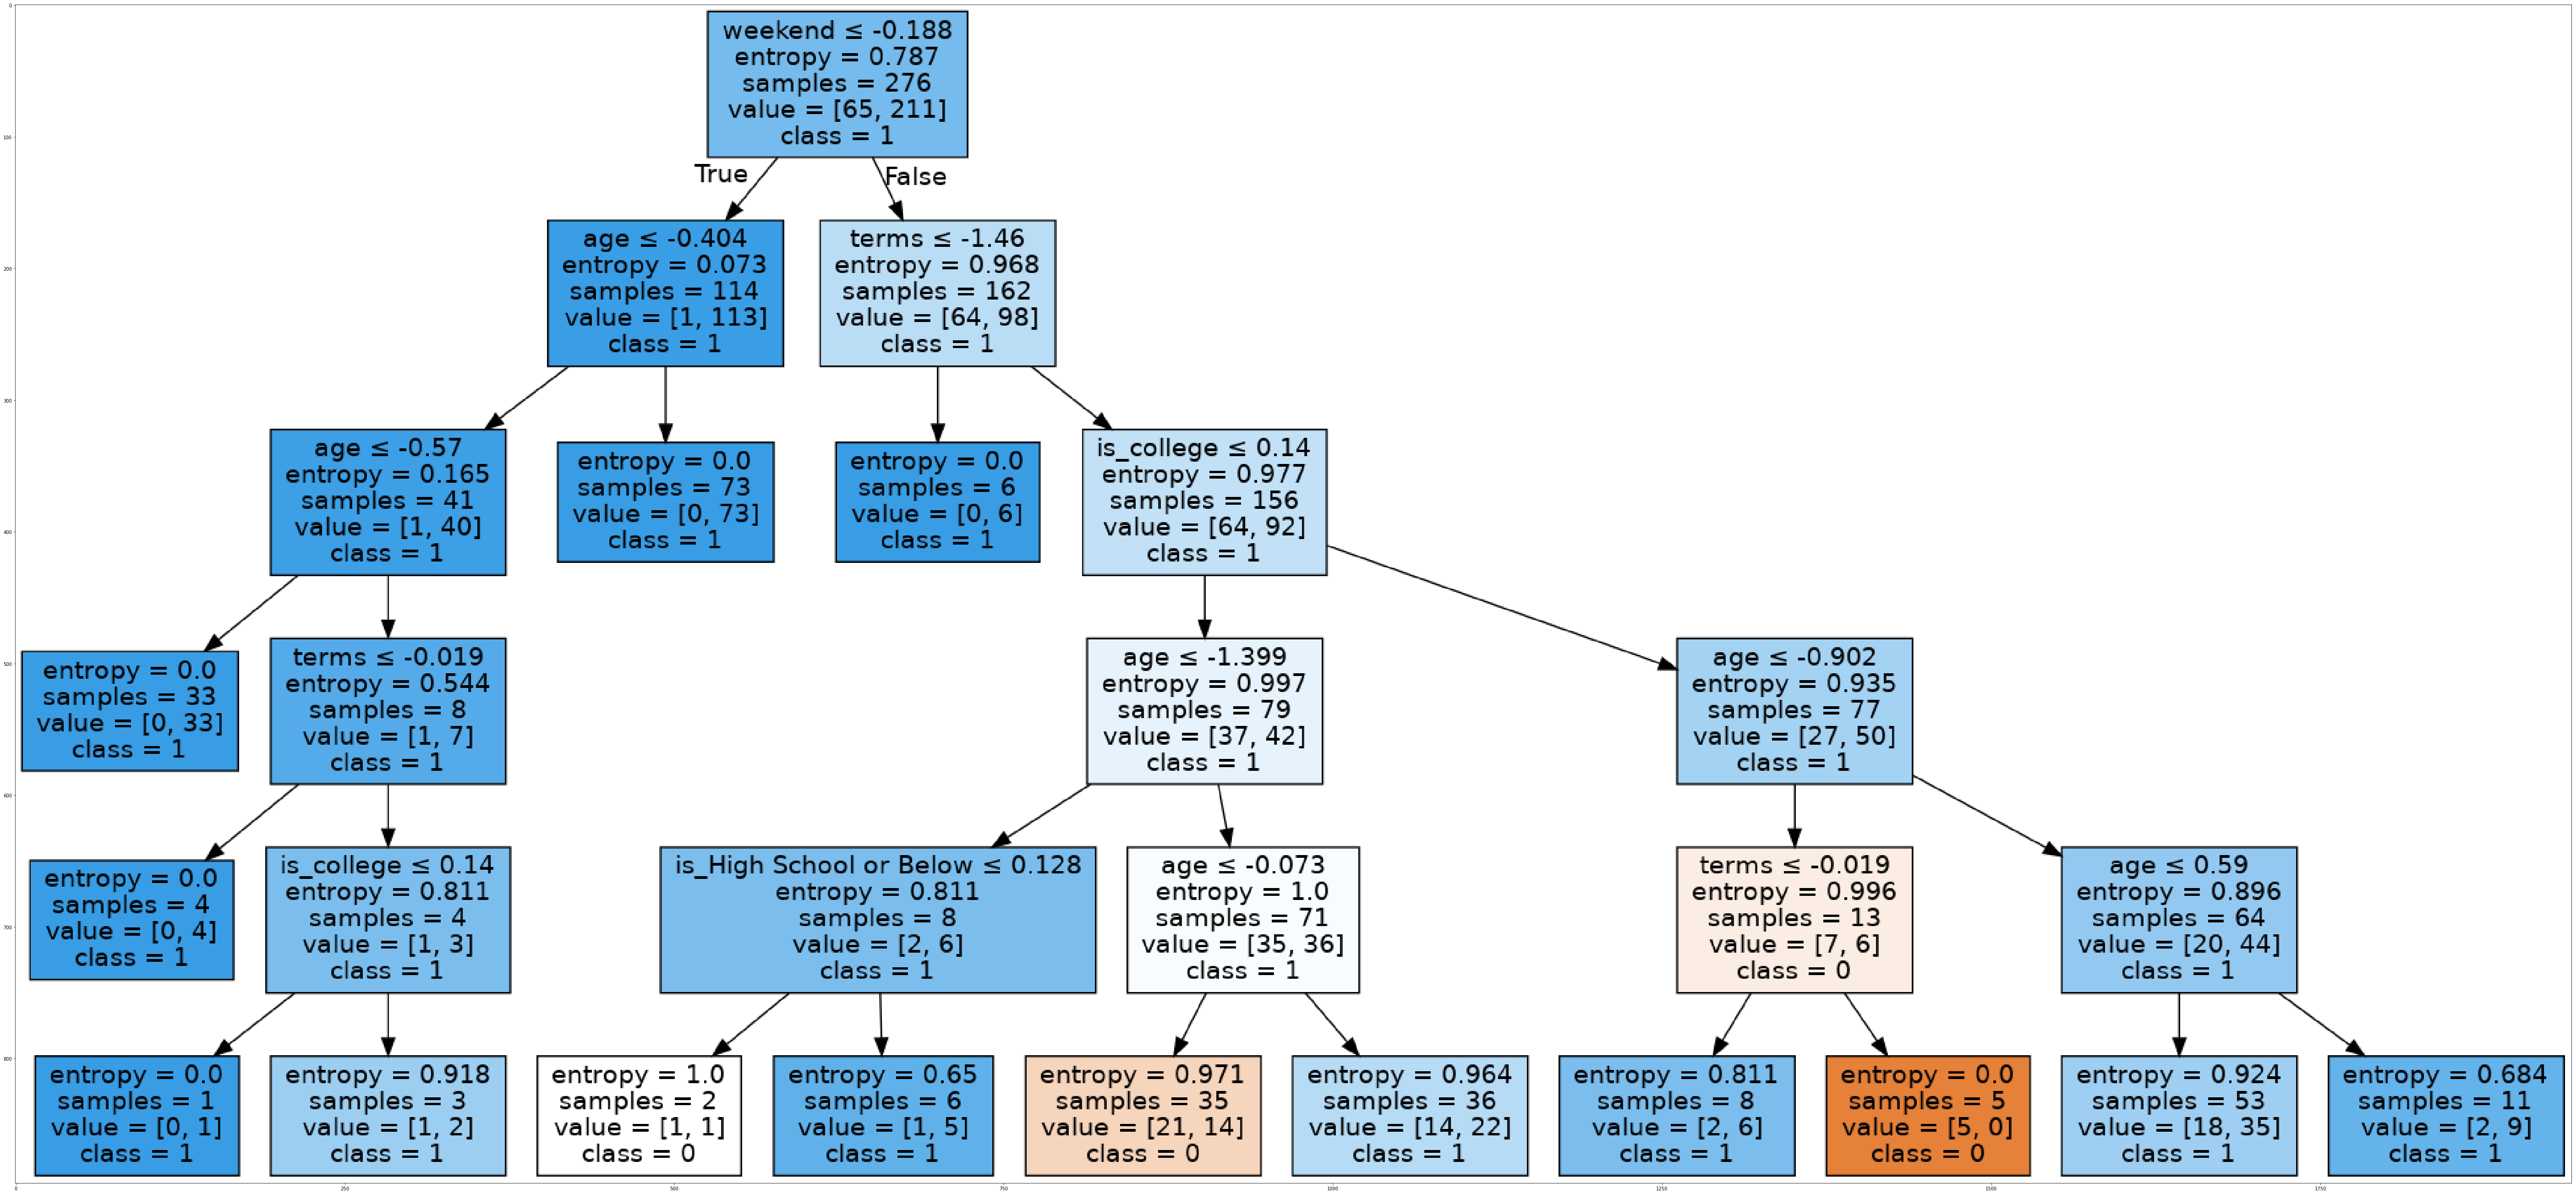

In [48]:
dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df.drop(["loan_status_trgt"],axis=1).columns
targetNames = df["loan_status_trgt"].unique().tolist()
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## SVM

In [49]:
from sklearn import svm

In [50]:
clf=svm.SVC(kernel="rbf",gamma=3).fit(X_train,y_train)

In [51]:
yhat3=clf.predict(X_test)
yhat3[0:5]

array([0, 1, 1, 0, 1])

In [52]:
print("Avg F1-score: " ,f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: " ,jaccard_similarity_score(y_test, yhat3))
print (classification_report(y_test, yhat3))

Avg F1-score:  0.64
Jaccard score:  0.6857142857142857
              precision    recall  f1-score   support

           0       0.44      0.19      0.27        21
           1       0.72      0.90      0.80        49

   micro avg       0.69      0.69      0.69        70
   macro avg       0.58      0.54      0.53        70
weighted avg       0.64      0.69      0.64        70



## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression 

In [54]:
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
yhat4=lr.predict(X_test)

In [56]:
yhat4[0:5]

array([1, 1, 1, 1, 1])

In [57]:
yhat_prob=lr.predict_proba(X_test)
yhat_prob[0:5]

array([[0.4966911 , 0.5033089 ],
       [0.47301059, 0.52698941],
       [0.49098147, 0.50901853],
       [0.49859458, 0.50140542],
       [0.47438892, 0.52561108]])

In [58]:
print("Avg F1-score: " ,f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: " ,jaccard_similarity_score(y_test, yhat4))
print("Log loss: " ,log_loss(y_test, yhat_prob))
print (classification_report(y_test, yhat4))

Avg F1-score:  0.6004459308807136
Jaccard score:  0.7
Log loss:  0.5858479985828119
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        21
           1       0.71      0.98      0.82        49

   micro avg       0.70      0.70      0.70        70
   macro avg       0.60      0.51      0.45        70
weighted avg       0.64      0.70      0.60        70



# Model Evaluation using Test Set

In [61]:

body = client_14b4209bc6034b579aeb2d178bff28c4.get_object(Bucket='bestclassifier-donotdelete-pr-tnsd8dqfwmd22z',Key='loan_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
test_df = pd.read_csv(body)
test_df.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [63]:
test_df['effective_date']=pd.DatetimeIndex(test_df.effective_date)
test_df['due_date']=pd.DatetimeIndex(test_df.due_date)
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 0 if (x<4)  else 1)
status_map={'PAIDOFF':1,'COLLECTION':0}
test_df['loan_status_trgt']=test_df['loan_status'].map(status_map)

dummies = pd.get_dummies(test_df['education']).rename(columns=lambda x: 'is_' + str(x))
test_df = pd.concat([test_df, dummies], axis=1)
test_df = test_df.drop(['education'],  axis=1)

dummies = pd.get_dummies(test_df['Gender']).rename(columns=lambda x: 'is_' + str(x))
test_df = pd.concat([test_df, dummies], axis=1)
test_df = test_df.drop(['Gender'], axis=1)

test_df = test_df.drop(['Loan_ID','loan_status','effective_date','due_date','dayofweek','is_female','is_Master or Above'],axis=1)
test_df.head()

,Principal,terms,age,weekend,loan_status_trgt,is_Bechalor,is_High School or Below,is_college,is_male
0,1000,30,50,0,1,1,0,0,0
1,300,7,35,1,1,0,0,0,1
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,1,1,0,0,1,1
4,800,15,29,1,1,1,0,0,1


In [64]:
X_test_set=df.drop(['loan_status_trgt'],axis=1)
y_test_set=df.loan_status_trgt
X_test_set=np.asarray(X)
y_test_set=np.asarray(y)

In [65]:
X_test_set=preprocessing.StandardScaler(with_mean=True,with_std=True).fit(X_test_set).transform(X_test_set.astype(float))
X_test_set[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.38170062,
         1.13639374, -0.86968108,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805,  2.61985426,
        -0.87997669, -0.86968108, -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.38170062,
        -0.87997669,  1.14984679,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679, -2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003, -0.38170062,
        -0.87997669,  1.14984679,  0.42056004]])

In [66]:
jaccard = []
f1 = []
logloss = []

# KNN

In [67]:
y1 = knn.predict(X_test_set)
jaccard.append(round(jaccard_similarity_score(y_test_set, y1),4))
f1.append(round(f1_score(y_test_set, y1, average='weighted'),4))
logloss.append("N/A")

# Decision Tree

In [68]:
y2 = dtree.predict(X_test_set)
jaccard.append(round(jaccard_similarity_score(y_test_set, y2),4))
f1.append(round(f1_score(y_test_set, y2, average='weighted'),4))
logloss.append("N/A")

# SVM

In [69]:
y3 = clf.predict(X_test_set)
jaccard.append(round(jaccard_similarity_score(y_test_set, y3),4))
f1.append(round(f1_score(y_test_set, y3, average='weighted'),4))
logloss.append("N/A")

# Logistic Regression

In [70]:
y4 = lr.predict(X_test_set)
y_prob = lr.predict_proba(X_test_set)
jaccard.append(round(jaccard_similarity_score(y_test_set, y4),4))
f1.append(round(f1_score(y_test_set, y4, average='weighted'),4))
logloss.append(log_loss(y_test_set, y_prob))

## Final report

In [72]:
data = {"Algorithm":["knn","decision","svm","logistic"],"Jaccard":jaccard,"F1-score":f1,"LogLoss":logloss}
report = pd.DataFrame(data)
print(report)

  Algorithm  Jaccard  F1-score   LogLoss
0       knn   0.8006    0.8086       N/A
1  decision   0.7861    0.7679       N/A
2       svm   0.8208    0.7986       N/A
3  logistic   0.7428    0.6638  0.554501
